<a href="https://colab.research.google.com/github/kavika29/GUVI-PROJECT/blob/main/major.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


set path

In [6]:
path = "/content/drive/MyDrive/traffic/traffic.csv"

In [11]:
path = "/content/drive/MyDrive/traffic/traffic.csv"
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_dataset=pd.read_csv(path)
df.head(5)

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [12]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [14]:
convert_dict = {'Junction': float
               }
  
df_dataset= df_dataset.astype(convert_dict)

In [15]:
X=df_dataset.values
y=df_dataset.iloc[38496:48120,0:3].values

In [16]:
print(X.shape,y.shape)

(48120, 4) (9624, 3)


In [17]:
df_train=pd.DataFrame(X, columns = ['DateTime','Junction','Vehicles','ID'])

In [18]:
df_train

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1.0,15,20151101001
1,2015-11-01 01:00:00,1.0,13,20151101011
2,2015-11-01 02:00:00,1.0,10,20151101021
3,2015-11-01 03:00:00,1.0,7,20151101031
4,2015-11-01 04:00:00,1.0,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4.0,11,20170630194
48116,2017-06-30 20:00:00,4.0,30,20170630204
48117,2017-06-30 21:00:00,4.0,16,20170630214
48118,2017-06-30 22:00:00,4.0,22,20170630224


In [19]:
df_test=pd.DataFrame(y, columns = ['DateTime','Junction','Vehicles'])

In [20]:
df_test

,DateTime,Junction,Vehicles
0,2016-11-23 00:00:00,3.0,17
1,2016-11-23 01:00:00,3.0,12
2,2016-11-23 02:00:00,3.0,10
3,2016-11-23 03:00:00,3.0,7
4,2016-11-23 04:00:00,3.0,4
...,...,...,...
9619,2017-06-30 19:00:00,4.0,11
9620,2017-06-30 20:00:00,4.0,30
9621,2017-06-30 21:00:00,4.0,16
9622,2017-06-30 22:00:00,4.0,22


In [21]:
df_temp= df_train.set_index(['Junction','DateTime'])

In [22]:
level_values = df_temp.index.get_level_values

In [25]:
train = df_train.pivot(index='DateTime',columns='Junction',values='Vehicles')
train

<ipython-input-25-772cd9f84d5c>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  train = df_train.pivot(index='DateTime',columns='Junction',values='Vehicles')


Junction,1.0,2.0,3.0,4.0
DateTime,,,,
2015-11-01 00:00:00,15,6,9,NaN
2015-11-01 01:00:00,13,6,7,NaN
2015-11-01 02:00:00,10,5,5,NaN
2015-11-01 03:00:00,7,6,1,NaN
2015-11-01 04:00:00,9,7,2,NaN
...,...,...,...,...
2017-06-30 19:00:00,105,34,33,11
2017-06-30 20:00:00,96,35,31,30
2017-06-30 21:00:00,90,31,28,16


In [26]:
train= train.fillna(0) #fill Nans with 0 vehicles

In [27]:
def gen_lag_features(df,n_in=1,n_out=1,dropnan=True):
    n_vars=df.shape[1]
    cols,names=list(),list()
    # input sequence (t-n,...t-1)
    for i in range(n_in,0,-1):
        cols.append(df.shift(i))
        names+=[('Junction %d (H-%d)'%(j+1,i)) for j in range(n_vars)]
    # forecast sequence (t,t+1...t+n)
    for i in range(0,n_out):
        cols.append(df.shift(-i))
        if i== 0:
            names+=[('Junction %d (H)' % (j+1)) for j in range(n_vars)]
        else:
            names+=[('Junction %d (H+%d)' % (j+1,i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols,axis=1)
    agg.columns=names
    # drop rows with Nan values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [28]:
Xy_train=gen_lag_features(train)
Xy_train

,Junction 1 (H-1),Junction 2 (H-1),Junction 3 (H-1),Junction 4 (H-1),Junction 1 (H),Junction 2 (H),Junction 3 (H),Junction 4 (H)
DateTime,,,,,,,,
2015-11-01 01:00:00,15.0,6.0,9.0,0.0,13,6,7,0
2015-11-01 02:00:00,13.0,6.0,7.0,0.0,10,5,5,0
2015-11-01 03:00:00,10.0,5.0,5.0,0.0,7,6,1,0
2015-11-01 04:00:00,7.0,6.0,1.0,0.0,9,7,2,0
2015-11-01 05:00:00,9.0,7.0,2.0,0.0,6,2,2,0
...,...,...,...,...,...,...,...,...
2017-06-30 19:00:00,95.0,34.0,38.0,17.0,105,34,33,11
2017-06-30 20:00:00,105.0,34.0,33.0,11.0,96,35,31,30
2017-06-30 21:00:00,96.0,35.0,31.0,30.0,90,31,28,16


In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler= MinMaxScaler(feature_range=(0,1))
Xy_train[Xy_train.columns] = scaler.fit_transform(Xy_train[Xy_train.columns])

Xy_train

,Junction 1 (H-1),Junction 2 (H-1),Junction 3 (H-1),Junction 4 (H-1),Junction 1 (H),Junction 2 (H),Junction 3 (H),Junction 4 (H)
DateTime,,,,,,,,
2015-11-01 01:00:00,0.066225,0.106383,0.044693,0.000000,0.052980,0.106383,0.033520,0.000000
2015-11-01 02:00:00,0.052980,0.106383,0.033520,0.000000,0.033113,0.085106,0.022346,0.000000
2015-11-01 03:00:00,0.033113,0.085106,0.022346,0.000000,0.013245,0.106383,0.000000,0.000000
2015-11-01 04:00:00,0.013245,0.106383,0.000000,0.000000,0.026490,0.127660,0.005587,0.000000
2015-11-01 05:00:00,0.026490,0.127660,0.005587,0.000000,0.006623,0.021277,0.005587,0.000000
...,...,...,...,...,...,...,...,...
2017-06-30 19:00:00,0.596026,0.702128,0.206704,0.472222,0.662252,0.702128,0.178771,0.305556
2017-06-30 20:00:00,0.662252,0.702128,0.178771,0.305556,0.602649,0.723404,0.167598,0.833333
2017-06-30 21:00:00,0.602649,0.723404,0.167598,0.833333,0.562914,0.638298,0.150838,0.444444


In [30]:
X_train = Xy_train[Xy_train.index< '2017-04-01'].iloc[:,0:4]
X_train

,Junction 1 (H-1),Junction 2 (H-1),Junction 3 (H-1),Junction 4 (H-1)
DateTime,,,,
2015-11-01 01:00:00,0.066225,0.106383,0.044693,0.000000
2015-11-01 02:00:00,0.052980,0.106383,0.033520,0.000000
2015-11-01 03:00:00,0.033113,0.085106,0.022346,0.000000
2015-11-01 04:00:00,0.013245,0.106383,0.000000,0.000000
2015-11-01 05:00:00,0.026490,0.127660,0.005587,0.000000
...,...,...,...,...
2017-03-31 19:00:00,0.476821,0.574468,0.178771,0.166667
2017-03-31 20:00:00,0.496689,0.531915,0.156425,0.222222
2017-03-31 21:00:00,0.483444,0.638298,0.156425,0.222222


In [31]:
y_train = Xy_train[Xy_train.index< '2017-04-01'].iloc[:,4:]
y_train

,Junction 1 (H),Junction 2 (H),Junction 3 (H),Junction 4 (H)
DateTime,,,,
2015-11-01 01:00:00,0.052980,0.106383,0.033520,0.000000
2015-11-01 02:00:00,0.033113,0.085106,0.022346,0.000000
2015-11-01 03:00:00,0.013245,0.106383,0.000000,0.000000
2015-11-01 04:00:00,0.026490,0.127660,0.005587,0.000000
2015-11-01 05:00:00,0.006623,0.021277,0.005587,0.000000
...,...,...,...,...
2017-03-31 19:00:00,0.496689,0.531915,0.156425,0.222222
2017-03-31 20:00:00,0.483444,0.638298,0.156425,0.222222
2017-03-31 21:00:00,0.403974,0.574468,0.150838,0.250000


RESHAPE THE DATA

In [32]:
print(X_train.shape,y_train.shape)

(12407, 4) (12407, 4)


In [33]:
X_train = np.expand_dims(X_train.values,axis=2)
print(X_train.shape)

y_train=y_train.values
print(y_train.shape)

(12407, 4, 1)
(12407, 4)


MODELING

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.initializers import he_normal
import keras.backend as K

def root_mean_squared_error(y_true,y_pred):
    return K.sqrt(K.mean(K.square(y_pred-y_true),axis=-1))

In [35]:
regressor = Sequential()

#Adding the input layer and the LSTM layer
regressor.add(LSTM(units=50,activation='relu',kernel_initializer= he_normal(seed=0),input_shape=(None,1)))

#output for 4 junctions
regressor.add(Dense(units =4))

#compiling the RNN
regressor.compile(optimizer='adam',loss=root_mean_squared_error)

In [36]:
regressor.fit(X_train,y_train,batch_size=128,epochs=100,verbose=1)

Epoch 1/100
97/97 [==============================] - 2s 6ms/step - loss: 0.0731
Epoch 2/100
97/97 [==============================] - 1s 6ms/step - loss: 0.0389
Epoch 3/100
97/97 [==============================] - 1s 6ms/step - loss: 0.0366
Epoch 4/100
97/97 [==============================] - 1s 6ms/step - loss: 0.0352
Epoch 5/100
97/97 [==============================] - 1s 6ms/step - loss: 0.0340
Epoch 6/100
97/97 [==============================] - 1s 6ms/step - loss: 0.0334
Epoch 7/100
97/97 [==============================] - 1s 6ms/step - loss: 0.0330
Epoch 8/100
97/97 [==============================] - 1s 6ms/step - loss: 0.0328
Epoch 9/100
97/97 [==============================] - 1s 9ms/step - loss: 0.0326
Epoch 10/100
97/97 [==============================] - 1s 9ms/step - loss: 0.0326
Epoch 11/100
97/97 [==============================] - 1s 8ms/step - loss: 0.0325
Epoch 12/100
97/97 [==============================] - 1s 8ms/step - loss: 0.0324
Epoch 13/100
97/97 [=================

VALIDATING

In [37]:
X_valid=Xy_train[Xy_train.index >='2017-04-01'].iloc[:,0:4]
X_valid

,Junction 1 (H-1),Junction 2 (H-1),Junction 3 (H-1),Junction 4 (H-1)
DateTime,,,,
2017-04-01 00:00:00,0.417219,0.553191,0.162011,0.166667
2017-04-01 01:00:00,0.384106,0.510638,0.122905,0.166667
2017-04-01 02:00:00,0.317881,0.574468,0.078212,0.138889
2017-04-01 03:00:00,0.238411,0.361702,0.083799,0.111111
2017-04-01 04:00:00,0.225166,0.361702,0.055866,0.111111
...,...,...,...,...
2017-06-30 19:00:00,0.596026,0.702128,0.206704,0.472222
2017-06-30 20:00:00,0.662252,0.702128,0.178771,0.305556
2017-06-30 21:00:00,0.602649,0.723404,0.167598,0.833333


In [38]:
X_valid = np.expand_dims(X_valid.values,axis=2)
y_pred = regressor.predict(X_valid)

69/69 [==============================] - 1s 3ms/step


In [39]:
y_pred=scaler.inverse_transform(np.concatenate((X_valid.squeeze(),y_pred),axis=1))[:,4:]
y_pred

array([[66.9530704 , 25.68947381, 27.394881  ,  7.1461494 ],
       [62.40780121, 23.71909064, 21.19659501,  6.59586632],
       [50.29842225, 24.12429059, 12.1787599 ,  4.35994685],
       ...,
       [94.39394522, 32.70678854, 12.63617586, 17.81678152],
       [85.79631734, 29.66389638, 23.2800185 , 11.15848196],
       [82.62431413, 27.63187361, 16.71890663, 14.09324777]])

In [40]:
y_truth = train[train.index>='2017-04-01']
y_truth

Junction,1.0,2.0,3.0,4.0
DateTime,,,,
2017-04-01 00:00:00,63,25,23,6
2017-04-01 01:00:00,53,28,15,5
2017-04-01 02:00:00,41,18,16,4
2017-04-01 03:00:00,39,18,11,4
2017-04-01 04:00:00,31,15,10,1
...,...,...,...,...
2017-06-30 19:00:00,105,34,33,11
2017-06-30 20:00:00,96,35,31,30
2017-06-30 21:00:00,90,31,28,16


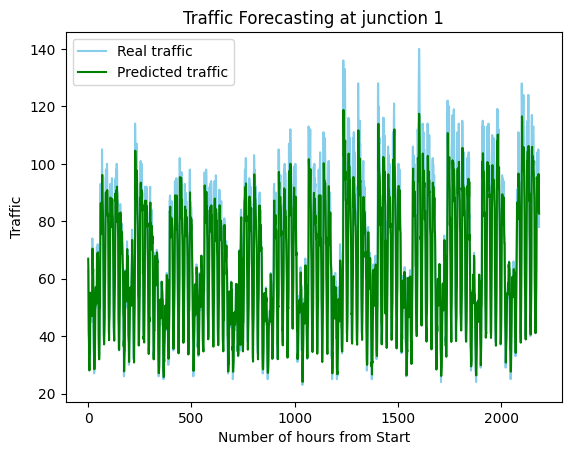

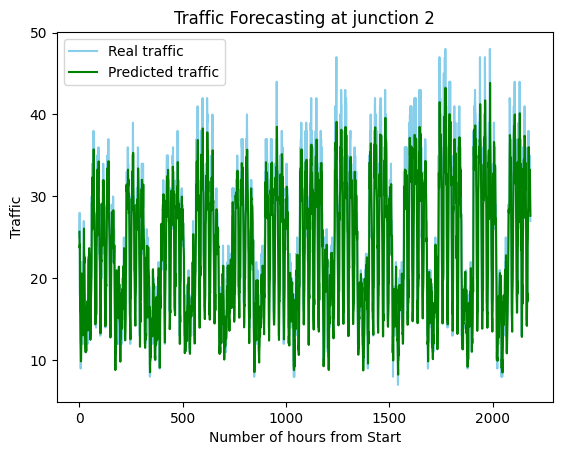

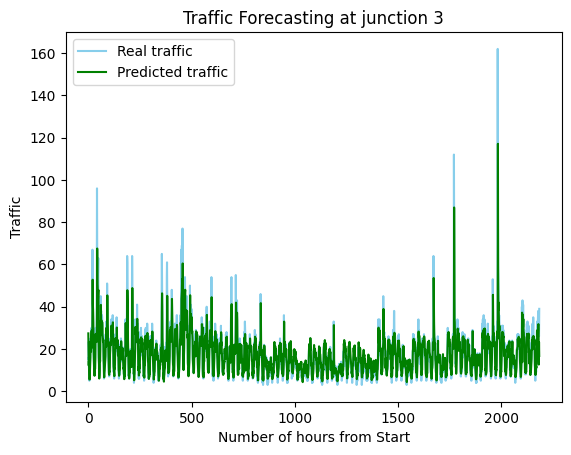

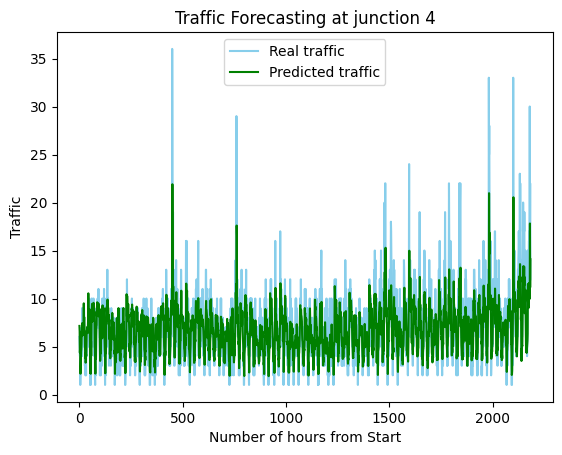

In [45]:
for junction in range(4):
    plt.figure
    plt.plot(y_truth.values[:,junction],color ='skyblue',label='Real traffic')
    plt.plot(y_pred[:,junction],color='green', label='Predicted traffic')
    plt.title('Traffic Forecasting at junction %i'%(junction+1))
    plt.xlabel('Number of hours from Start')
    plt.ylabel('Traffic')
    plt.legend()
    plt.show()